In [9]:
import requests
import pandas as pd
import datetime as dt
from numpy import float64
import matplotlib.pyplot as plt
import seaborn as sns
import time



# URL of our endpoint
URL = "https://2krjwwbp8d.execute-api.us-east-1.amazonaws.com/prod/hello"


# read the testfile
df = pd.read_csv('data/data1000.csv', sep=',')

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1.0,12/1/2010 12:43,1.65,14729.0,United Kingdom
996,536520,22100,SKULLS SQUARE TISSUE BOX,1.0,12/1/2010 12:43,1.25,14729.0,United Kingdom
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1.0,12/1/2010 12:43,1.25,14729.0,United Kingdom
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1.0,12/1/2010 12:43,2.55,14729.0,United Kingdom


<Figure size 720x432 with 0 Axes>

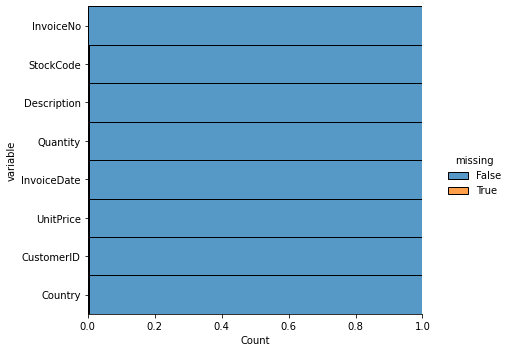

In [11]:
# Identify missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
    )
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

Text(0.5, 1.0, 'Quantifying missing data')

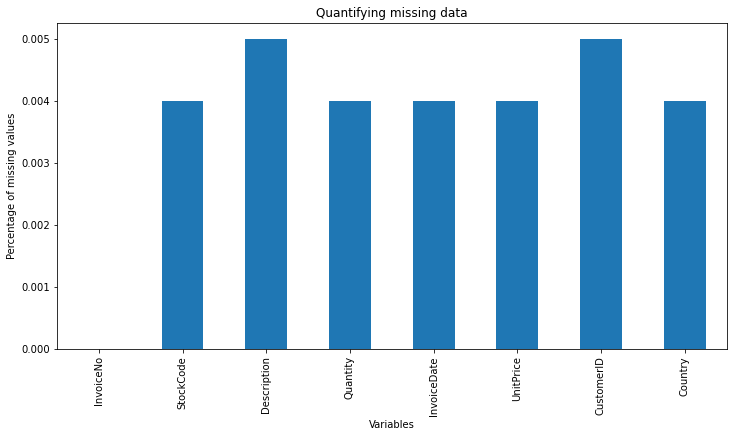

In [12]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [13]:
df.dropna(axis=0, how='any', inplace=True)

Text(0.5, 1.0, 'Quantifying missing data')

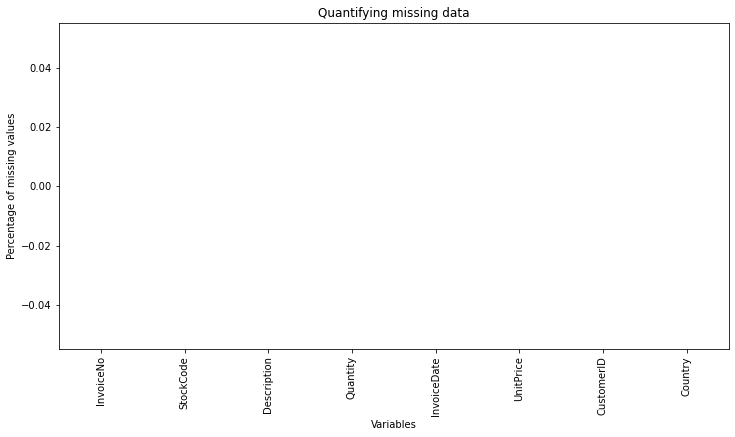

In [14]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [15]:
data = df.copy()

In [16]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1.0,12/1/2010 12:43,1.65,14729.0,United Kingdom
996,536520,22100,SKULLS SQUARE TISSUE BOX,1.0,12/1/2010 12:43,1.25,14729.0,United Kingdom
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1.0,12/1/2010 12:43,1.25,14729.0,United Kingdom
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1.0,12/1/2010 12:43,2.55,14729.0,United Kingdom


In [ ]:

# write a single row from the testfile into the api
#export = data.loc[2].to_json()
#response = requests.post(URL, data = export)
# print(response)

# write all the rows from the testfile to the api as put request
for i in data.index:
    try:
        # convert the row to json
        export = data.loc[i].to_json()

        # send it to the api
        response = requests.post(URL, data=export)

        # print the returncode
        print(export)
        print(response)
    except:
        print(data.loc[i])
